In [1]:
import sys

from IPython.display import Image, display
if 'google.colab' in sys.modules:
    from google.colab import drive
    drive.mount('/content/drive')

%cd '/content/drive/MyDrive/Inteligencia Artificial/IA - Clases de Práctica/ContenidosPorTemas'

[WinError 3] El sistema no puede encontrar la ruta especificada: "'/content/drive/MyDrive/Inteligencia Artificial/IA - Clases de Práctica/ContenidosPorTemas'"
c:\Users\anaso\OneDrive\Escritorio\repositorios\InteligenciaArtificial\PS_PMC


C:\Users\anaso\AppData\Roaming\Python\Python311\site-packages\IPython\core\magics\osm.py:393: UserWarning: This is now an optional IPython functionality, using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})


# Perceptrón Simple


Un Perceptrón simple (PS) es la red neuronal más sencilla que se puede considerar, está conformado por una sola neurona que posee N entradas y una función de transferencia de tipo umbral, tal como se ve en la siguiente figura:

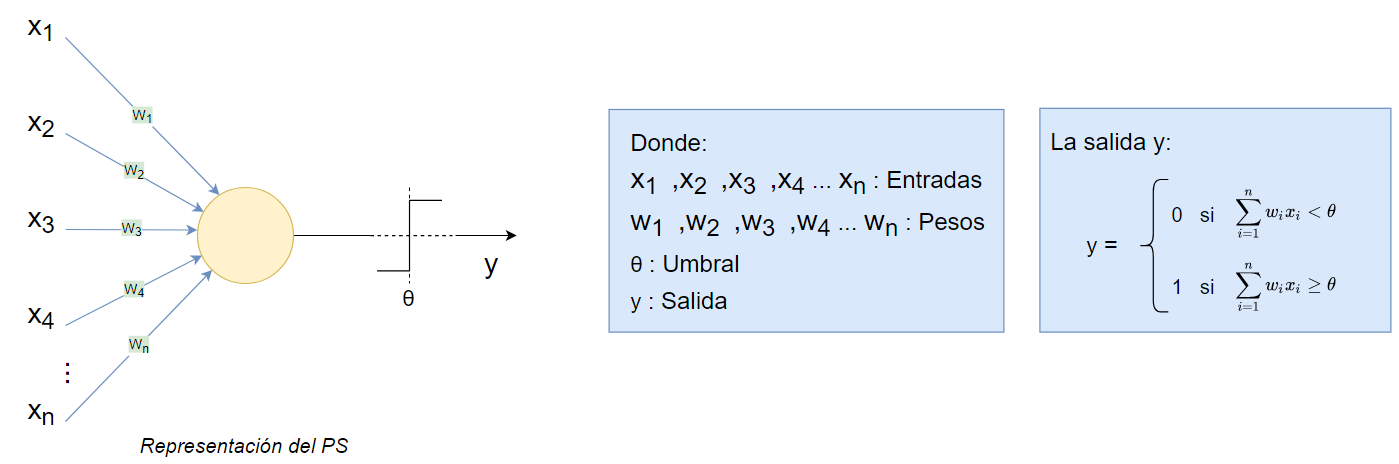

In [2]:
display(Image(filename='./2_imagenes/perceptron.png', width=1000))

Haciendo un pequeño cambio y llevando el umbral $\theta$ hacia la izquierda en las ecuaciones anteriores, podemos definir un nuevo peso
$w_0$ y la entrada $x_0 = 1$ para poder escribir la salida de forma más compacta:

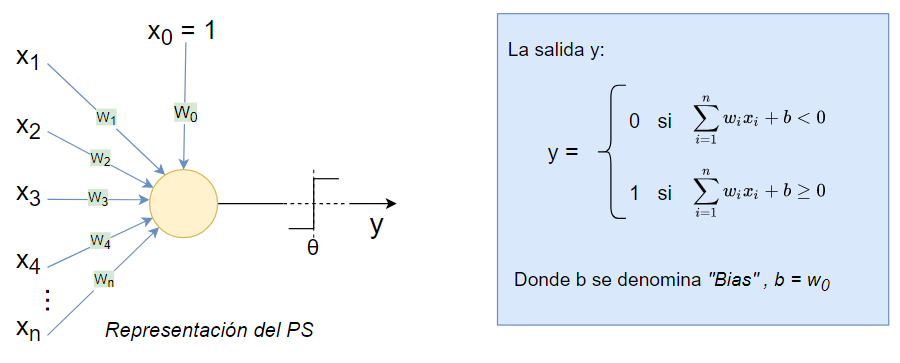

In [3]:
display(Image(filename='./2_imagenes/perceptron_bias.png', width=1000))

Podemos representar la salida con la siguiente expresión: $$y = sign(\sum\limits_{i=0}^N {x_i w_i})$$

_**sign**_ corresponde a la función signo y es la _función de activación_ del perceptrón simple. Más adelante veremos que existen otras funciones de activación para otras aplicaciones.

El PS permite resolver problemas linealmente separables mediante una recta o un hiperplano de separación con ordenada al origen distinta de cero gracias al término de _Bias_

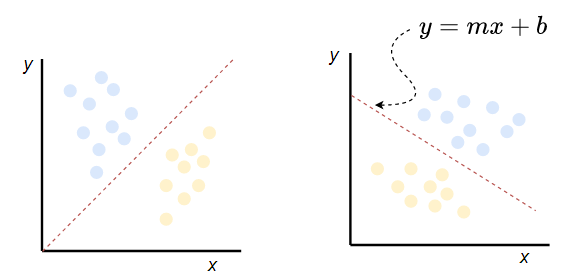

In [4]:
display(Image(filename='./2_imagenes/lineal_separable.png', width=700))

A continuación, vamos a implementar la _clase Perceptron_ y el algoritmo de entrenamiento o _Regla del Perceptrón Simple_ 🙂

Esta regla puede implementarse siguiendo estos pasos:
1. Inicializar el vector de pesos w con valores aleatorios entre 0 y 1.
2. Presentar un patrón de entrada x y calcular la salida $$y = sign(x_0 w_0 + \sum\limits_{i=1}^N {x_i w_i})$$  Recordemos que $w_0$ es el término correspondiente al bias y $x_0=1$, podemos representar la suma de productos usando un producto punto entre vectores: $$y = sign( w_0 + \vec{w}^T \cdot \vec{x})$$

3. Calcular el error entre la salida obtenida y la salida deseada $y_d$ $$e = y - y_d$$
4. Ajustar los pesos de la red con la siguiente ecuación: $$ \vec{w} = \vec{w} + \mu \vec{e} \cdot \vec{x}$$ $\mu$ es el coeficiente de aprendizaje o factor de entrenamiento (eta)
5. Volver al paso 2 y repetir el proceso hasta terminar el número de iteraciones

In [5]:
# Librerías a importar
import numpy as np
from numpy.random import RandomState
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
class Perceptron(object):
    """Perceptrón simple.

    Parámetros
    ------------
    eta : float
        factor de entrenamiento (entre 0.0 y 1.0)
    epocas : int
        iteraciones para el entrenamiento.
    random_state : int
        Semilla generadora de números aleatorios para la inicialización de los pesos.

    Atributos
    -----------
    w_ : 1d-array
        Pesos despues del entrenamiento.
    mal_clasificados_ : list
        Número de desaciertos en cada época
    """
    def __init__(self, eta=0.001, epocas=1, random_state=None):
        self.eta = eta
        self.epocas = epocas
        self.random_state = random_state

    def fit(self, X, y):
        """Función de entrenamiento.
        Parameters
        ----------
        X : array, shape = [n_muestras, n_caracteristicas]
          vector de entrenamiento
        y : array, shape = [n_muestras]
          vector target.

        Returns
        -------
        self : objeto

        """

        rgen = RandomState(self.random_state)
        # inicializo los pesos con valores aleatorios entre 0 y 1 rgen.normal
        # https://numpy.org/doc/stable/reference/random/generated/numpy.random.RandomState.normal.html
        self.w_ = rgen.normal(size=1+X.shape[1], loc=0.5, scale=0.17)  # la media (0.50 +- 3 veces la desviación estandar (0.17)
        # self.W_ = rgen.uniform(size=1+X.shape[1], low=0.0, high=1.0)
        self.mal_clasificados_ = []
        self.errores_ = []

        mal_clasificados = 0

        # para cada época
        for _ in range(self.epocas):
            errores_epoca = []

            for xi, target in zip(X, y):

                # cálculo de la salida
                salida = self.predict(xi)
                print(X, xi, target)

                print(salida)

                # cálculo del error y actualización del vector de pesos
                error = target - salida

                self.w_[1:] += (self.eta * (error) * xi)  # actualización del peso correspondiente a las características de entrada
                self.w_[0] += (self.eta * (error))  # actualización del sesgo (bias)
                self.errores_.append(error)

                mal_clasificados += int(error != 0.0)

            self.mal_clasificados_.append(mal_clasificados)

            return self

    def calcular_entrada(self, X):
        """cálculo de la entrada al perceptrón"""
        # -------suma de los productos de los valores de entrada y los pesos -----------
        entrada = np.dot(X, self.w_[1:])+self.w_[0]
        print(entrada)
        print(X)
        return entrada
        #-------------------------------------------------------------------------------

    def predict(self, X):
        """devuelve la etiqueta de la clase pertenciente después de aplicar la fn. de activación"""
        # la función de activación es la función signo:
        # 0 si el resultado de calcular_entrada < 0
        # 1 si el resultado de calcular_entrada >= 0
        return np.where(self.calcular_entrada(X) >= 0.0, 1.0, 0)



## Dataset Iris
El conjunto de datos flor Iris contiene 50 muestras de cada una de tres especies de Iris (Iris setosa, Iris versicolor e Iris virginica), en total 150 muestras. Se tienen 4 características: el largo y ancho del sépalo y pétalo, en centímetros.

In [7]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

df.tail()


,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


# Graficamos el Dataset

Separe los datos en predictores (`X`) y etiquetas (`y`). Considere sólo las clases `setosa`y `versicolor` y los atributos de la primer y tercera columnas como características de entrada, Largo de sépalo (primer columna) y largo de pétalo (tercer columna). Grafique los datos.

In [8]:
#convertimos las etiquetas de clases en  0 (Iris-setosa)  y 1 (Iris-versicolor)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

df_filtered = df[df.iloc[:, 4].isin(['Iris-setosa', 'Iris-versicolor'])]
X = df_filtered[ [0, 2] ]
y = df_filtered[4]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=1,  stratify = y)
label_encoder.fit(y_train)
y_train = label_encoder.transform(y_train)  # 0 es setosa, 1 versicolor
X_train=X_train.to_numpy()
y_train

array([1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1])

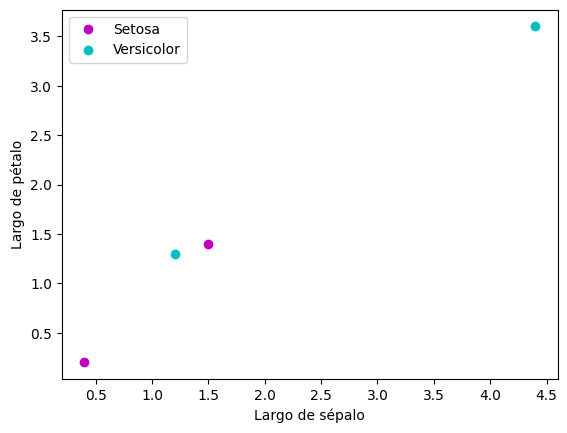

In [25]:
import matplotlib.pyplot as plt

# Graficar los datos
#plt.figure(figsize=(10, 6))
plt.scatter(X_train[y_train == 0][0], X_train[y_train == 0][1], color='m', label='Setosa')
plt.scatter(X_train[y_train == 1][0], X_train[y_train == 1][1], color='c', label='Versicolor')

plt.xlabel('Largo de sépalo')
plt.ylabel('Largo de pétalo')
plt.legend()
plt.show()


# Entrenamiento del Perceptrón

Utilice la clase implementada para entrenar el perceptrón, pruebe con diferentes valores de coeficiente de entrenamiento y número de iteraciones.

Haga un gráfico de los mal clasificados por época en función de las épocas y una gráfica de los errores de entrenamiento en cada iteración.

In [10]:
#Instancio un objeto de la clase Perceptron
perceptron = Perceptron(eta= 0.01, epocas=10, random_state=100)

#llamo al método fit
perceptron.fit(X_train, y_train)


6.307864743435492
[5.7 4.2]
[[5.7 4.2]
 [5.  1.4]
 [4.3 1.1]
 [5.  1.6]
 [6.2 4.5]
 [5.7 4.5]
 [5.8 1.2]
 [5.1 1.5]
 [5.1 1.6]
 [6.3 4.9]
 [5.1 1.5]
 [4.7 1.3]
 [5.4 4.5]
 [6.4 4.5]
 [4.4 1.3]
 [5.4 1.5]
 [5.5 1.4]
 [5.5 4. ]
 [5.2 1.5]
 [5.5 4.4]
 [5.4 1.5]
 [5.5 3.7]
 [4.6 1.4]
 [5.1 1.9]
 [6.  5.1]
 [5.  3.3]
 [6.1 4.6]
 [5.  1.4]
 [5.  1.5]
 [5.6 4.1]
 [5.8 4.1]
 [5.6 3.9]
 [4.6 1.5]
 [4.4 1.3]
 [5.7 3.5]
 [5.7 4.2]
 [6.7 4.4]
 [4.8 1.4]
 [5.8 4. ]
 [6.7 5. ]
 [5.  3.5]
 [5.4 1.7]
 [4.9 1.4]
 [5.5 3.8]
 [5.9 4.2]
 [6.6 4.4]
 [5.7 1.7]
 [4.6 1. ]
 [6.3 4.4]
 [6.  4.5]
 [6.6 4.6]
 [5.  1.2]
 [5.1 1.5]
 [4.9 1.5]
 [5.6 4.2]
 [4.8 1.6]
 [6.7 4.7]
 [5.1 1.7]
 [5.8 3.9]
 [5.2 3.9]
 [5.  1.6]
 [6.2 4.3]
 [4.8 1.9]
 [5.2 1.5]
 [5.5 1.3]
 [6.9 4.9]
 [5.9 4.8]
 [6.1 4.7]
 [4.6 1.4]
 [5.2 1.4]
 [4.5 1.3]
 [6.1 4.7]
 [5.7 4.1]
 [4.7 1.6]
 [5.1 1.4]
 [5.  1.3]
 [6.  4.5]
 [5.6 3.6]
 [5.3 1.5]
 [7.  4.7]] [5.7 4.2] 1
1.0
3.968240733419225
[5.  1.4]
[[5.7 4.2]
 [5.  1.4]
 [4.3 1.1]
 [5.  1.6]
 [6

Text(0.5, 1.0, 'Mal clasificados por época')

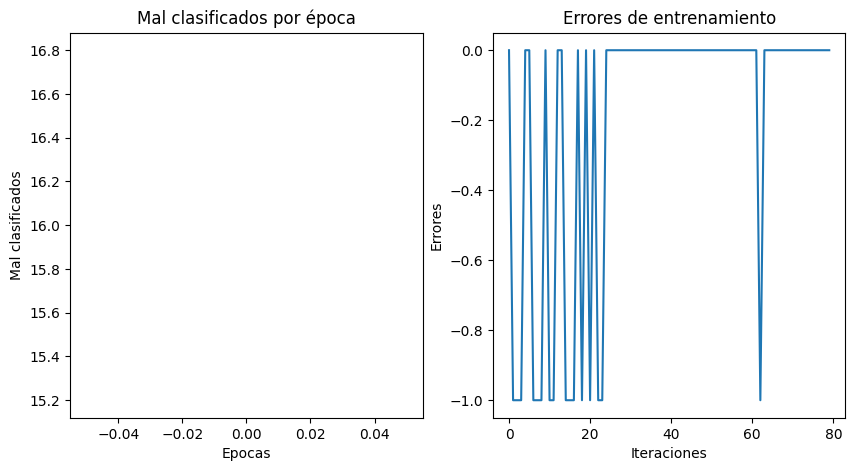

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
#Grafico el número de errores o mal clasificados en cada iteración
axs[1].plot(perceptron.errores_)
axs[1].set_xlabel('Iteraciones')
axs[1].set_ylabel('Errores')
axs[1].set_title('Errores de entrenamiento')

#Grafico el número de errores por época
axs[0].plot(perceptron.mal_clasificados_)
axs[0].set_xlabel('Epocas')
axs[0].set_ylabel('Mal clasificados')
axs[0].set_title('Mal clasificados por época')

Recordemos la ecuación: $$y = sign(w_0 + \sum\limits_{i=1}^N {x_i w_i})$$

Para este problema con dos características (x1 = longitudes del sépalo y x2= longitudes de pétalo ), la ecuación resulta:

$$y = sign(x_1 w_1 + x_2 w_2 + w_0)$$

Donde se separan las dos clases de flores, tendremos la frontera de decisión, dada por la ecuación:

$$x_1 w_1 + x_2 w_2 + w_0 = 0$$

De esta ecuación podemos despejar la recta $x_2$ en función de $x_1$ que separa las clases en el espacio de soluciones

$$x_2 + x_1 \frac{w_1}{w_2} + \frac{w_0}{w_2} = 0$$

$$x_2 =  -\frac{w_1}{w_2}x_1 - \frac{w_0}{w_2} $$

La pendiente de la recta  $ m = -\frac{w_1}{w_2}$ y la ordenada al origen $ b = - \frac{w_0}{w_2}$

### Ahora vamos a graficar esta recta

In [12]:
#------------------ Representación de la recta ------------------------------------
# vector de pesos del perceptrón entrenado

# cálculo de la pendiente

# cálculo de la ordenada al origen

# armo la recta y la grafico junto a los datos



## Perceptrón Usando scikit-learn

Ahora utilice las 3 clases del conjunto de datos usando las mismas características (atributos de la primer y tercera columnas). separe los datos en entrenamiento y prueba (20% datos de prueba), `random_state=100`

In [13]:
from sklearn import datasets, model_selection
from sklearn.preprocessing import StandardScaler

iris=datasets.load_iris()

X = iris.data[:, [2, 3]]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=1,  stratify = y)

sc = StandardScaler()
sc.fit(X_train)


StandardScaler()

Entrene un perceptrón simple usando la clase [Perceptron](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html) de scikit-learn.

Utilice la función plot_decision_regions para graficar las regiones de decisión de las 3 clases, grafique los datos de entrenamiento y prueba, diferenciándolos

In [14]:
from modulos.graficacion import plot_decision_regions

Evalúe el desempeño del clasificador